In [1]:
file_name = "20min_crawler_history.log"
with open(file_name, "r") as fp:
    lines = fp.readlines()

len(lines)

69

In [2]:
from json import loads
json_objs = list(map(loads, lines))
len(json_objs)

69

In [3]:
json_objs[0]

{'date_time': 1671279851,
 'statistics': {'crawler_statistics': {'urls_in_queue': 0,
   'known_urls': 0,
   'known_urls_composition': {},
   'status_codes': {}},
  'processor_statistics': {'files_parsed': 0,
   'files_uploaded': 0,
   'dropped_statistics': {'not_an_article': 0,
    'no_title': 0,
    'no_lead': 0,
    'no_published': 0,
    'no_author': 0,
    'no_text': 0,
    'dropped_articles': []}}}}

In [4]:
from datetime import datetime
timestamps = map(lambda x: x["date_time"], json_objs)
datetimes = list(map(lambda x: datetime.fromtimestamp(x), timestamps))
datetimes[0]

datetime.datetime(2022, 12, 17, 13, 24, 11)

In [5]:
qs_snapshots = list(map(lambda x: x["statistics"]["crawler_statistics"]["urls_in_queue"], json_objs))
qs_snapshots[0]

0

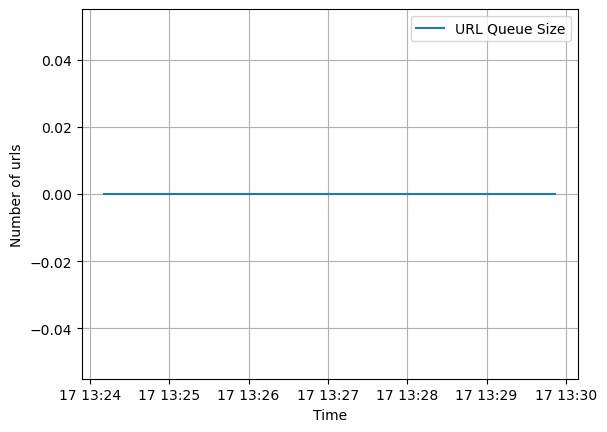

In [6]:
import matplotlib.pyplot as plt
plt.plot(datetimes, qs_snapshots, label="URL Queue Size")
plt.legend()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Number of urls")
plt.show()

In [7]:
json_objs[0]["statistics"]

{'crawler_statistics': {'urls_in_queue': 0,
  'known_urls': 0,
  'known_urls_composition': {},
  'status_codes': {}},
 'processor_statistics': {'files_parsed': 0,
  'files_uploaded': 0,
  'dropped_statistics': {'not_an_article': 0,
   'no_title': 0,
   'no_lead': 0,
   'no_published': 0,
   'no_author': 0,
   'no_text': 0,
   'dropped_articles': []}}}

In [8]:
parsed_files = list(map(lambda x: x["statistics"]["processor_statistics"]["files_parsed"], json_objs))
uploaded_files = list(map(lambda x: x["statistics"]["processor_statistics"]["files_uploaded"], json_objs))
known_urls = list(map(lambda x: x["statistics"]["crawler_statistics"]["known_urls"], json_objs))

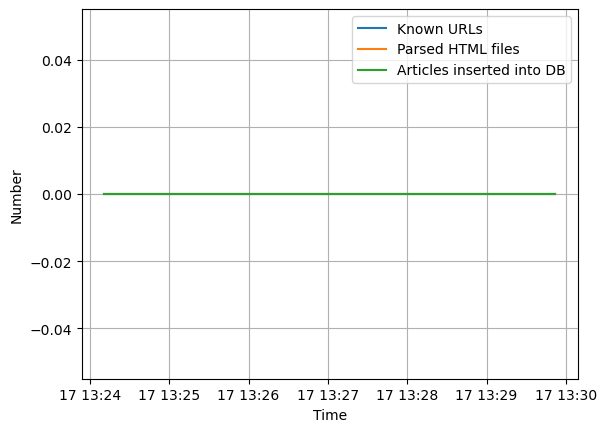

In [9]:
import matplotlib.pyplot as plt

plt.plot(datetimes, known_urls, label="Known URLs")
plt.plot(datetimes, parsed_files, label="Parsed HTML files")
plt.plot(datetimes, uploaded_files, label="Articles inserted into DB")
plt.legend()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Number")
plt.show()

In [10]:
status_codes = json_objs[-1]["statistics"]["crawler_statistics"]["status_codes"]
status_codes

{}

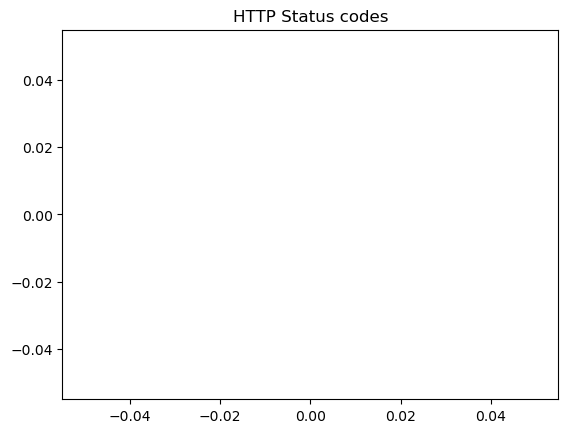

In [11]:
keys = status_codes.keys()
plt.bar(keys, [status_codes[x] for x in keys])
plt.title("HTTP Status codes")
plt.show()